In [21]:
import random 

class Player:
    def __init__(self, E, R, T):
        self.endowment = E
        self.fitness = 0
        self.payoff = 0
        self.count = 0
        self.strategies = []
        for r in range(R):
            tau = random.uniform(0, T)
            j =  E / R if random.getrandbits(1) else 0
            k =  E / R if random.getrandbits(1) else 0
            self.strategies.append({"tau": tau, "j": j, "k": k})
            
    def _initialize(E):
        self.updateEndowment(E)
        self.updateFitness(0)
        self.updatePayoff(0)
        self.updateCount(0)
    
    def _updateEndowment(self, endowment):
        self.endowment = endowment
        
    def _updatePayoff(self, payoff):
        self.payoff = payoff
        
    def _updateCount(self, count):
        self.count = count
        
    def _updateFitness(self, fitness):
        self.fitness = fitness
        
    def _calcFitness(self, fitness):
        beta = 1
        return math.exp(beta * self.payoff)
    
    def mutation(E, R, r):
        mu = self.strategies[r]["tau"]
        sigma = 0.15
        self.strategies[r]["tau"] = random.normalvariate(mu, sigma)
        self.strategies[r]["j"] = E / R if self.strategies[r]["j"] == 0 else 0
        self.strategies[r]["k"] = E / R if self.strategies[r]["k"] == 0 else 0
            
def randIntsNodup(a, b, k):
    ns = []
    while len(ns) < k:
        n = random.randint(a, b)
    if not n in ns:
        ns.append(n)
    return ns            

E = 40
R = 10
M = 6
T = E * M /  2
N = 100
generations = 10000
G = 1000
mu = 0.03
risks = [0.1]
players = []
print("start")
for risk in risks:
    for i in range(N):
        players.append(Player(E, R, T))
    for generation in range(generations):
        if generation / 100 > 0:
            print(generation / 100)
        for g in range(G):
            participants = randIntsNodup(0, N - 1, M)
            for participant in participants:
                players[participant].updateEndowment(E)
                players[participant].updateCount(players[participant].count + 1)

            commonPool = 0
            for r in range(R):
                contributionPerRound = 0
                for participant in participants:
                    if commonPool >= players[participant].strategies[r]["tau"]:
                        contribution = players[participant].strategies[r]["j"]
                    else:
                        contribution = players[participant].strategies[r]["k"]
                    contributionPerRound += countribution
                    players[participant].updateEndowment(players[participant].endowment - contribution)
                commonPool = contributionPerRound

            if commonPool < T:
                for participant in partipants:
                    players[participant].updateEndowment((1.0 - risk) * players[partipant].endowment)

            for participant in participants:
                players.updatePayoff(players[participant].payoff + players[partipant].endowment)
    
        for i in range(N):
            players[i].updatePayoff(players[i].payoff / players[i].count)

        for i in range(N):
            players[i].updateFitness(players[i].calcFitness())
    
        sumFitness = 0
        nextPlayers = []

        for i in range(N):
            sumFitness = players[i].fitness

        for i in range(N):
            random = random.random()
            rate = 0
            for j in range(N):
                if random < rate:
                    nextPlayers.append(players[j])
        players = nextPlayers

        for i in range(N):
            if random.random() < mu:
                for r in range(R):
                    players[i].mutation(E, R, r)

        if generation == generations - 1:
            sumPayoff = 0
            for i in range(N):
                sumPayoff += players.payoff

        for i in range(N):
            players[i].initialize(E)
        
    print(sumPayoff)

start


KeyboardInterrupt: 

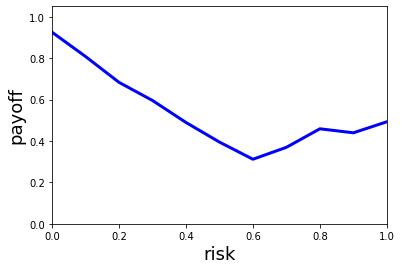

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# generations = [i for i in range(201)]
risks = [i / 10 for i in range(11)]
with open("./reproduction.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        plt.plot(risks, row, color="blue", linestyle='solid', linewidth = 3.0)
plt.xlabel('risk', fontsize=18)
plt.ylabel('payoff', fontsize=18)
plt.xlim([-0.0, 1.0])
plt.ylim([0.00, 1.05])
# plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=14)
plt.show()

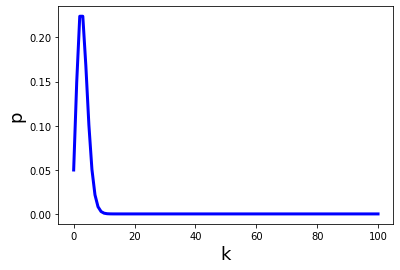

In [4]:
import math
import matplotlib.pyplot as plt
N = 100
mu = 0.03
mutationProb = []
lamda = N * mu
xlist = []

for k in range(N + 1):
    xlist.append(k)
    mutationProb.append((math.pow(lamda, k) * math.exp(-lamda) ) / math.factorial(k))
plt.plot(xlist, mutationProb, color="blue", linestyle='solid', linewidth = 3.0)
plt.xlabel('k', fontsize=18)
plt.ylabel('p', fontsize=18)
plt.show()

[0.921023543, 0.830834033, 0.724604193, 0.637437138, 0.543229608, 0.449175297, 0.349547672, 0.262737455, 0.436923764, 0.493482536, 0.496167157]
[0.934998415, 0.805338268, 0.694574276, 0.592317954, 0.489008242, 0.389730671, 0.295739121, 0.267109226, 0.474657802, 0.491355435, 0.489565012]
[0.925144276, 0.79422317, 0.703725691, 0.609161264, 0.514213802, 0.430236276, 0.335153558, 0.263952033, 0.369639213, 0.400951928, 0.495584471]


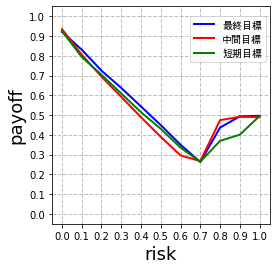

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# import japanize_matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

risks = [i / 10 for i in range(11)]
settings = [
    { 'option': '最終目標', 'color': 'blue'},
    { 'option': '中間目標', 'color': 'red'},
    { 'option': '短期目標', 'color': 'green'},
]
with open("./reproduction-all.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        print(row)
        plt.plot(risks, row, color=settings[i]['color'], linestyle='solid', linewidth = 2.0, label=settings[i]['option'])
plt.xlabel('risk', fontsize=18)
plt.ylabel('payoff', fontsize=18)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks([i / 10 for i in range(11)])
plt.yticks([i / 10 for i in range(11)])
plt.legend(bbox_to_anchor=(1.03, 0.7), loc='lower right', borderaxespad=1, fontsize=14, prop={"family":"MS Gothic"})
ax.grid(which = "major", axis = "x", alpha = 0.8,linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "y", alpha = 0.8,linestyle = "--", linewidth = 1)
plt.show()

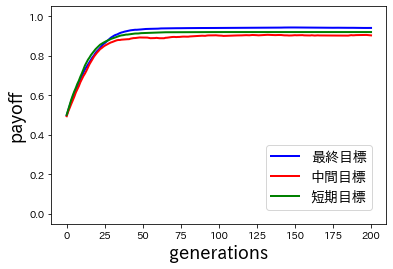

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import csv
risks = [i / 10 for i in range(11)]
settings = [
    { 'option': '最終目標', 'color': 'blue'},
    { 'option': '中間目標', 'color': 'red'},
    { 'option': '短期目標', 'color': 'green'},
]
generations = [i for i in range(201)]
# plt.plot(risks, maxpayoffs, color='black', linestyle='solid', linewidth = 3.0, label="max payoff")
with open("./generation-all.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        plt.plot(generations, row, color=settings[i]['color'], linestyle='solid', linewidth = 2.0, label=settings[i]['option'])
plt.xlabel('generations', fontsize=18)
plt.ylabel('payoff', fontsize=18)
plt.ylim([-0.05, 1.05])
plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=14, , prop={"family":"MS Gothic"})
plt.show()

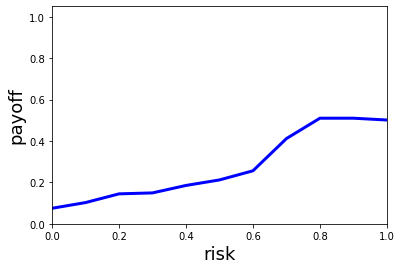

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# generations = [i for i in range(201)]
risks = [i / 10 for i in range(11)]
with open("./contribution.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        plt.plot(risks, row, color="blue", linestyle='solid', linewidth = 3.0)
plt.xlabel('risk', fontsize=18)
plt.ylabel('payoff', fontsize=18)
plt.xlim([-0.0, 1.0])
plt.ylim([0.00, 1.05])
# plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=14)
plt.show()

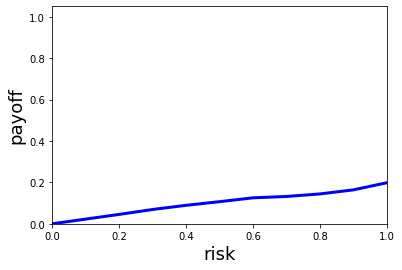

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# generations = [i for i in range(201)]
risks = [i / 10 for i in range(11)]
with open("./fine.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        plt.plot(risks, row, color="blue", linestyle='solid', linewidth = 3.0)
plt.xlabel('risk', fontsize=18)
plt.ylabel('payoff', fontsize=18)
plt.xlim([-0.0, 1.0])
plt.ylim([0.00, 1.05])
# plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=14)
plt.show()

[0.078976733, 0.07720145, 0.094703017, 0.089015517, 0.094002267, 0.100864083, 0.1258467, 0.146232617, 0.441830267, 0.498775317, 0.500084317]
[0.065001583, 0.0824777, 0.08638655, 0.087628183, 0.095504083, 0.11326005, 0.1369943, 0.235753233, 0.497391633, 0.499904267, 0.49987575]
[0.074854467, 0.078978383, 0.073744317, 0.08233385, 0.0830205, 0.09786185, 0.113077117, 0.1657995, 0.417044533, 0.424131417, 0.399456883]


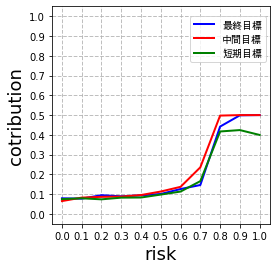

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# import japanize_matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

risks = [i / 10 for i in range(11)]
settings = [
    { 'option': '最終目標', 'color': 'blue'},
    { 'option': '中間目標', 'color': 'red'},
    { 'option': '短期目標', 'color': 'green'},
]
with open("./contribution-all.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        print(row)
        plt.plot(risks, row, color=settings[i]['color'], linestyle='solid', linewidth = 2.0, label=settings[i]['option'])
plt.xlabel('risk', fontsize=18)
plt.ylabel('cotribution', fontsize=18)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks([i / 10 for i in range(11)])
plt.yticks([i / 10 for i in range(11)])
plt.legend(bbox_to_anchor=(1.03, 0.7), loc='lower right', borderaxespad=1, fontsize=14, prop={"family":"MS Gothic"})
ax.grid(which = "major", axis = "x", alpha = 0.8,linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "y", alpha = 0.8,linestyle = "--", linewidth = 1)
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.022414509, 0.044846647, 0.066497523, 0.088184193, 0.107550917, 0.12362018, 0.104698242, 0.007917113, 0.00516663, 0.004990642]
[0.0, 0.038485705, 0.046634839, 0.047624787, 0.060499874, 0.041064982, 0.050604478, 0.066993191, 0.078451728, 0.089612657, 0.1]


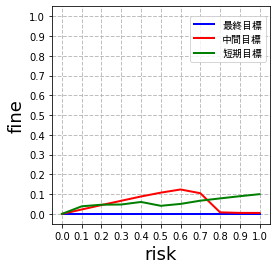

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# import japanize_matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')

risks = [i / 10 for i in range(11)]
settings = [
    { 'option': '最終目標', 'color': 'blue'},
    { 'option': '中間目標', 'color': 'red'},
    { 'option': '短期目標', 'color': 'green'},
]
with open("./fine-all.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        print(row)
        plt.plot(risks, row, color=settings[i]['color'], linestyle='solid', linewidth = 2.0, label=settings[i]['option'])
plt.xlabel('risk', fontsize=18)
plt.ylabel('fine', fontsize=18)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks([i / 10 for i in range(11)])
plt.yticks([i / 10 for i in range(11)])
plt.legend(bbox_to_anchor=(1.03, 0.7), loc='lower right', borderaxespad=1, fontsize=14, prop={"family":"MS Gothic"})
ax.grid(which = "major", axis = "x", alpha = 0.8,linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "y", alpha = 0.8,linestyle = "--", linewidth = 1)
plt.show()

[0.4738604, 0.4632087, 0.5682181, 0.5340931, 0.5640136, 0.6051845, 0.7550802, 0.8773957, 2.6509816, 2.9926519, 3.0005059]
[0.3900095, 0.4948662, 0.5183193, 0.5257691, 0.5730245, 0.6795603, 0.8219658, 1.4145194, 2.9843498, 2.9994256, 2.9992545]
[0.4491268, 0.704784533, 0.722274932, 0.779751824, 0.861122242, 0.83356099, 0.982089568, 1.396756145, 2.972977568, 3.082464439, 2.9967413]


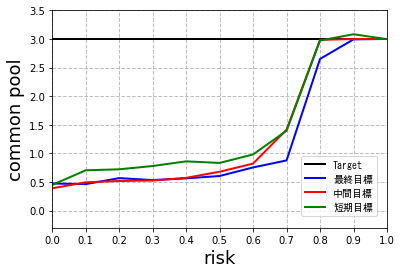

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# import japanize_matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_aspect('equal', adjustable='box')

targets = [3.0 for i in range(11)]

plt.plot(risks, targets, color='black', linestyle='solid', linewidth = 2.0, label='Target')

risks = [i / 10 for i in range(11)]
settings = [
    { 'option': '最終目標', 'color': 'blue'},
    { 'option': '中間目標', 'color': 'red'},
    { 'option': '短期目標', 'color': 'green'},
]
with open("./target-all.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        print(row)
        plt.plot(risks, row, color=settings[i]['color'], linestyle='solid', linewidth = 2.0, label=settings[i]['option'])
plt.xlabel('risk', fontsize=18)
plt.ylabel('common pool', fontsize=18)
plt.xlim([-0, 1.00])
plt.ylim([-0.3, 3.50])
plt.xticks([i / 10 for i in range(11)])
# plt.yticks([i / 10 for i in range(11)])
plt.legend(bbox_to_anchor=(1.00, 0.01), loc='lower right', borderaxespad=1, fontsize=14, prop={"family":"MS Gothic"})
ax.grid(which = "major", axis = "x", alpha = 0.8,linestyle = "--", linewidth = 1)
ax.grid(which = "major", axis = "y", alpha = 0.8,linestyle = "--", linewidth = 1)
plt.show()